# Module 2 Week 3
## Data Visualization and Technical Analysis

In [1]:
### Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, os
warnings.filterwarnings("ignore")
plt.style.use("classic")
pd.set_option("display.max_columns", None)
sns.set(rc={'figure.figsize':(20, 10)}) ## Setting Figure Sizes as 20, 10
%matplotlib inline

### Problem 2.1: Load the `week2.csv` (Week 1 Final Dataset) file into a dataframe.
1. What is the type of the `Date` Column? Make sure it is of type datetime64. Convert the `Date` column to the index of the dataframe.
2. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
3. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock This would be helpful if we are to train our model to take NLP inputs.

In [2]:
## Loading Week 2 csv file
df = pd.read_csv("../Module 1/Week 2/week2.csv", parse_dates=['Date'])
df = df.iloc[:, 1:]
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
0,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
1,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


In [3]:
## Date Column Data-type
print(df.Date.dtypes)
if df.Date.dtypes == 'O':
    print("The Date Column is of Object Type")

datetime64[ns]


In [4]:
df.set_index("Date", inplace=True, drop=False)

As this is not in `datetime64` format so we have to convert it into this format.

In [5]:
df.describe()

,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,4.940000e+02,494.000000,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000
mean,2387.748684,2386.112146,2412.039575,2362.413866,2386.900911,2387.279251,2387.545040,2.154751e+06,4.914692e+09,95827.566802,1.183271e+06,56.849312,2017.858300,6.485830,2514.527814,0.000297
std,463.565049,461.347984,470.430776,457.931108,463.288365,463.709942,464.726731,2.579232e+06,6.651663e+09,57134.390316,1.600605e+06,12.114263,0.694927,3.455131,142.955357,0.027161
min,1721.600000,1723.000000,1734.900000,1711.150000,1723.000000,1721.600000,1725.850000,4.341100e+04,1.120856e+08,2351.000000,1.386900e+04,21.480000,2017.000000,1.000000,2281.870000,-0.504550
25%,1987.912500,1989.475000,2005.500000,1973.250000,1988.887500,1987.912500,1988.825000,9.365380e+05,2.444368e+09,51852.750000,5.490995e+05,48.020000,2017.000000,4.000000,2427.950000,-0.006608
50%,2398.575000,2396.925000,2433.000000,2377.650000,2398.100000,2398.575000,2402.990000,1.696750e+06,3.959611e+09,86986.500000,9.150305e+05,56.750000,2018.000000,6.500000,2495.010000,0.000760
75%,2638.237500,2635.750000,2669.450000,2619.787500,2638.000000,2638.237500,2641.310000,2.622279e+06,5.725864e+09,125993.250000,1.465679e+06,66.310000,2018.000000,9.000000,2572.067500,0.008877
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+11,482657.000000,3.155626e+07,85.180000,2019.000000,12.000000,2866.090000,0.066210


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  494 non-null    object        
 1   Series                  494 non-null    object        
 2   Date                    494 non-null    datetime64[ns]
 3   Prev Close              494 non-null    float64       
 4   Open Price              494 non-null    float64       
 5   High Price              494 non-null    float64       
 6   Low Price               494 non-null    float64       
 7   Last Price              494 non-null    float64       
 8   Close Price             494 non-null    float64       
 9   Average Price           494 non-null    float64       
 10  Total Traded Quantity   494 non-null    int64         
 11  Turnover                494 non-null    float64       
 12  No. of Trades           494 non

WE can use `"astype('datetime64')"` property to change Date Column to `'datetime64'` format

In [7]:
df['Date'] = df.Date.astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 494 entries, 2017-05-15 to 2019-05-13
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  494 non-null    object        
 1   Series                  494 non-null    object        
 2   Date                    494 non-null    datetime64[ns]
 3   Prev Close              494 non-null    float64       
 4   Open Price              494 non-null    float64       
 5   High Price              494 non-null    float64       
 6   Low Price               494 non-null    float64       
 7   Last Price              494 non-null    float64       
 8   Close Price             494 non-null    float64       
 9   Average Price           494 non-null    float64       
 10  Total Traded Quantity   494 non-null    int64         
 11  Turnover                494 non-null    float64       
 12  No. of Trades           494 non

The `Date` column is converted into `"datetime64"` format.

In [8]:
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


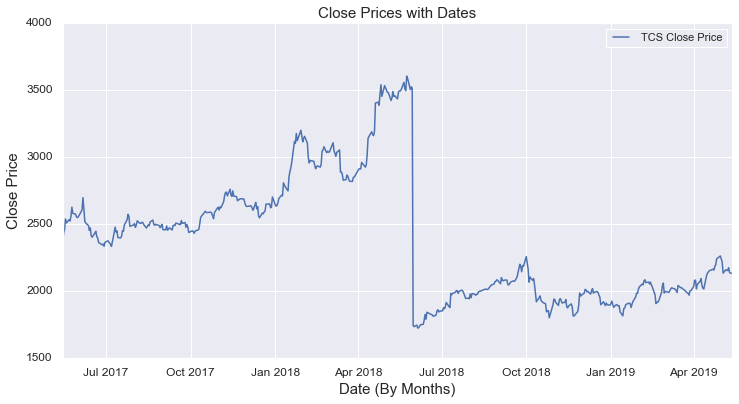

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close Price', label='TCS Close Price')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Close Prices with Dates", fontsize = 15)
plt.xlabel("Date (By Months)", fontsize=15)
plt.ylabel("Close Price", fontsize=15)
plt.legend()
plt.show()

From the above plot, we can see that:
1. The Closing Price came down with a large margin during May-June Period.
2. The Closing Prices were very less after the major down-fall.

## Problem 2.2: A stem plot is a discrete series plot, ideal for plotting DayWise data.
It can be plotted using the `plt.stem()` function.

- Display a stem plot of the daily change in of the stock price in percentage. <br>
- This column was calculated in module 1 and should be already available in `week2.csv`. Observe whenever there's a large change.

In [10]:
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


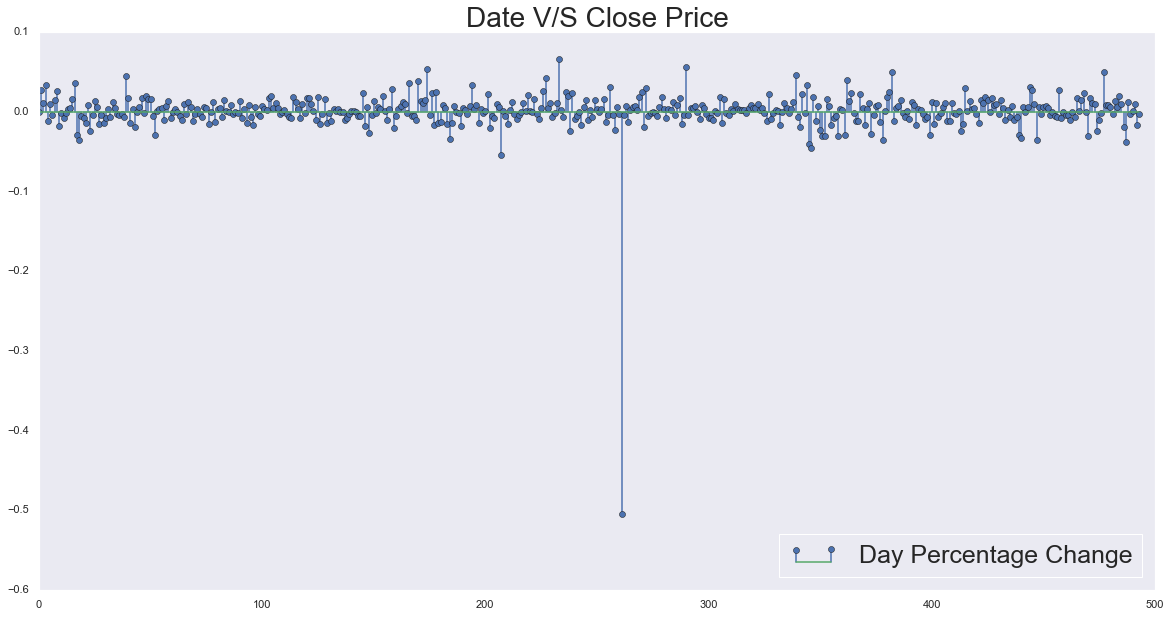

In [11]:
plt.figure(figsize=(20, 10))
plt.stem(df['Day_Perc_Change'], label='Day Percentage Change')
plt.title('Date V/S Close Price', fontsize=28)
plt.legend(loc='lower right', fontsize=25)
plt.grid()
plt.show()

## Problem 2.3: Plot the daily volumes as well and compare the percentage stem plot to it.

Document your analysis of the relationship between volume and daily percentage change.

In [12]:
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


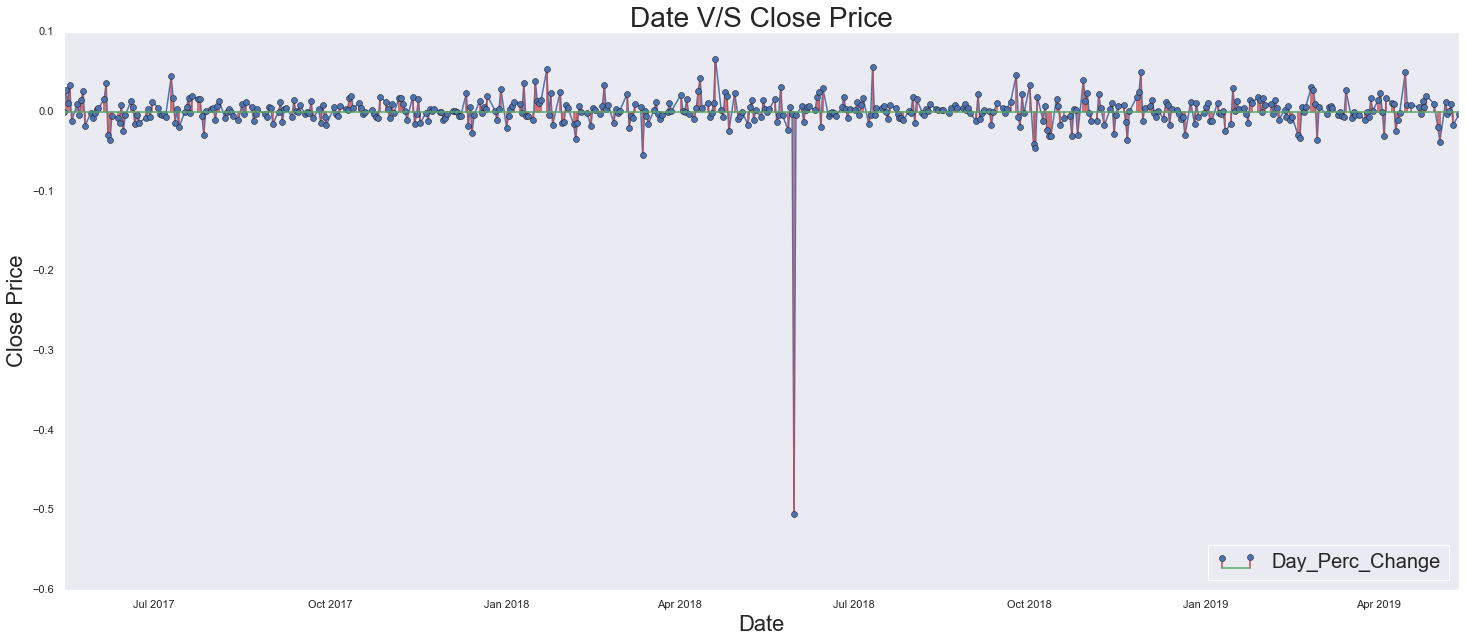

In [13]:
plt.figure(figsize=(25, 10))
plt.plot(df['Date'], df['Day_Perc_Change'], 'b')
plt.stem(df['Date'], df['Day_Perc_Change'], 'r', label='Day_Perc_Change')
plt.xlabel('Date', fontsize=22)
plt.ylabel('Close Price', fontsize=22)
plt.title('Date V/S Close Price', fontsize=28)
plt.legend(loc='lower right', fontsize=20)
plt.grid()
plt.show()

## 2.4 We want to see how often each Trend type occurs.

- We had created a Trend column in `module 1`. We want to see how often each Trend type occurs. This can be seen as a __Pie Chart__, with each sector representing the percentage of days each trend occurs.

- We can also use `groupby()` function with the trend column to group all days with same trend into a single group before plotting  the pie chart. 

- Create a __BAR plot__ of average & median values of `"Total Traded Quantity"`.

In [14]:
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change


In [15]:
trend_groupby = df.groupby('Trend').count()['Symbol']
trend_groupby

Trend
Slight or No change    494
Name: Symbol, dtype: int64

In [16]:
df.Trend.value_counts(normalize=True)

Slight or No change    1.0
Name: Trend, dtype: float64

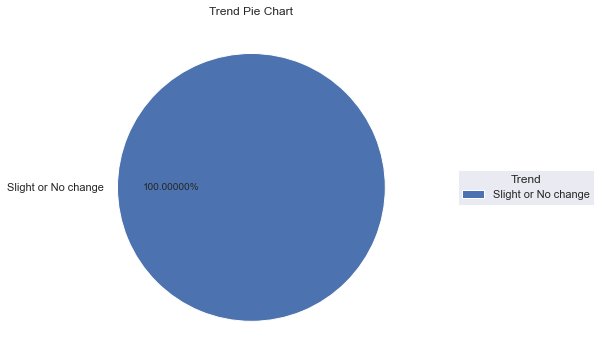

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(trend_groupby, labels=trend_groupby.index, autopct='%1.5f%%')

ax.set_title("Trend Pie Chart")
ax.legend(trend_groupby.index,
          title="Trend",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

plt.show()

In [18]:
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change


In [19]:
groupby_trend = df.groupby('Trend', as_index = False)['Total Traded Quantity']

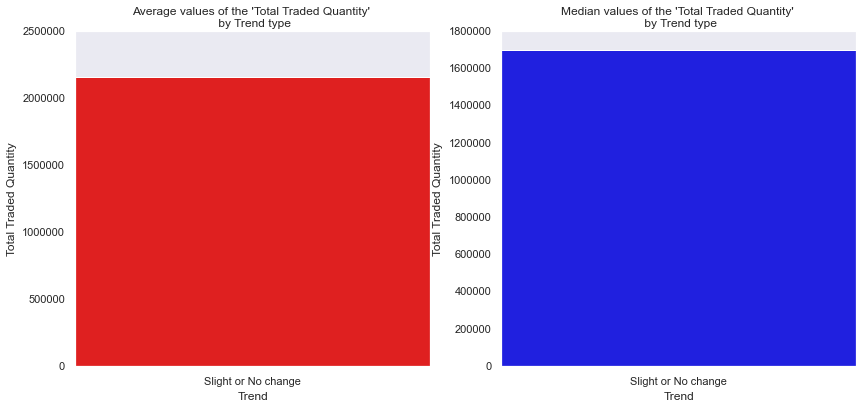

In [20]:
fig, axes = plt.subplots(figsize=(14, 6), nrows=1, ncols=2)

axes[0].set_title("Average values of the 'Total Traded Quantity' \n by Trend type")
sns.barplot(ax = axes[0], x = 'Trend', y = 'Total Traded Quantity', color = 'red', 
            data = groupby_trend.mean().sort_values('Total Traded Quantity'))

axes[1].set_title("Median values of the 'Total Traded Quantity' \n by Trend type")
sns.barplot(ax = axes[1], x = 'Trend', y = 'Total Traded Quantity', color = 'blue', 
            data = groupby_trend.median().sort_values('Total Traded Quantity'))

plt.show()

## Problem 2.5 Plot the daily return (percentage) distribution as a histogram.

Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes.

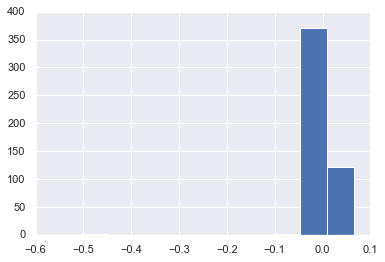

In [21]:
df.Day_Perc_Change.hist()

__Well, this plot is not so much clear so we can use `distplot()` as the plot for more information.__

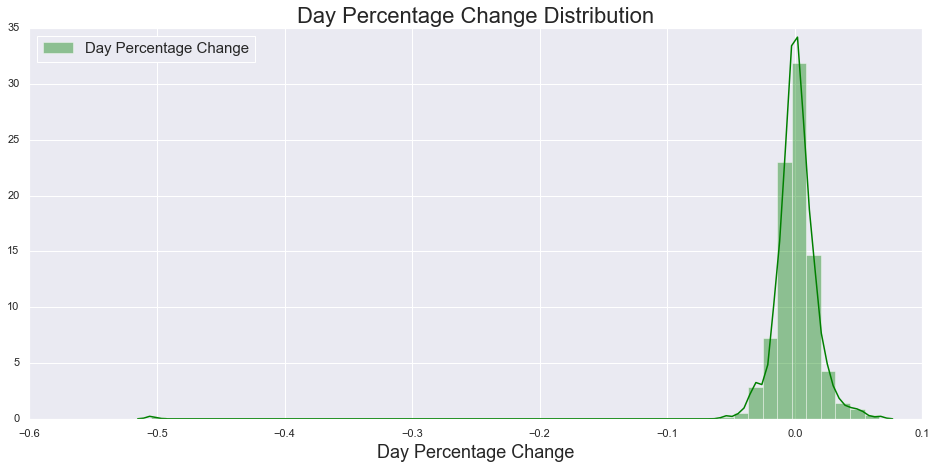

In [22]:
plt.figure(figsize=(16, 7))

sns.distplot(df['Day_Perc_Change'], kde=True, rug=False, color = 'green', label = 'Day Percentage Change')
plt.legend(loc='upper left', fontsize=15)
plt.title("Day Percentage Change Distribution", fontsize=22)
plt.xlabel("Day Percentage Change", fontsize=18)
plt.show()


## 2.6 We next want to analyse how the behaviour of different stocks are correlated.

The correlation is performed on the percentage change of the stock price instead of the stock price.

- Load any 5 stocks of your choice into 5 dataframes. 
- Retain only rows for which ‘Series’ column has value ‘EQ’. 
- Create a single dataframe which contains the ‘Closing Price’ of each stock.

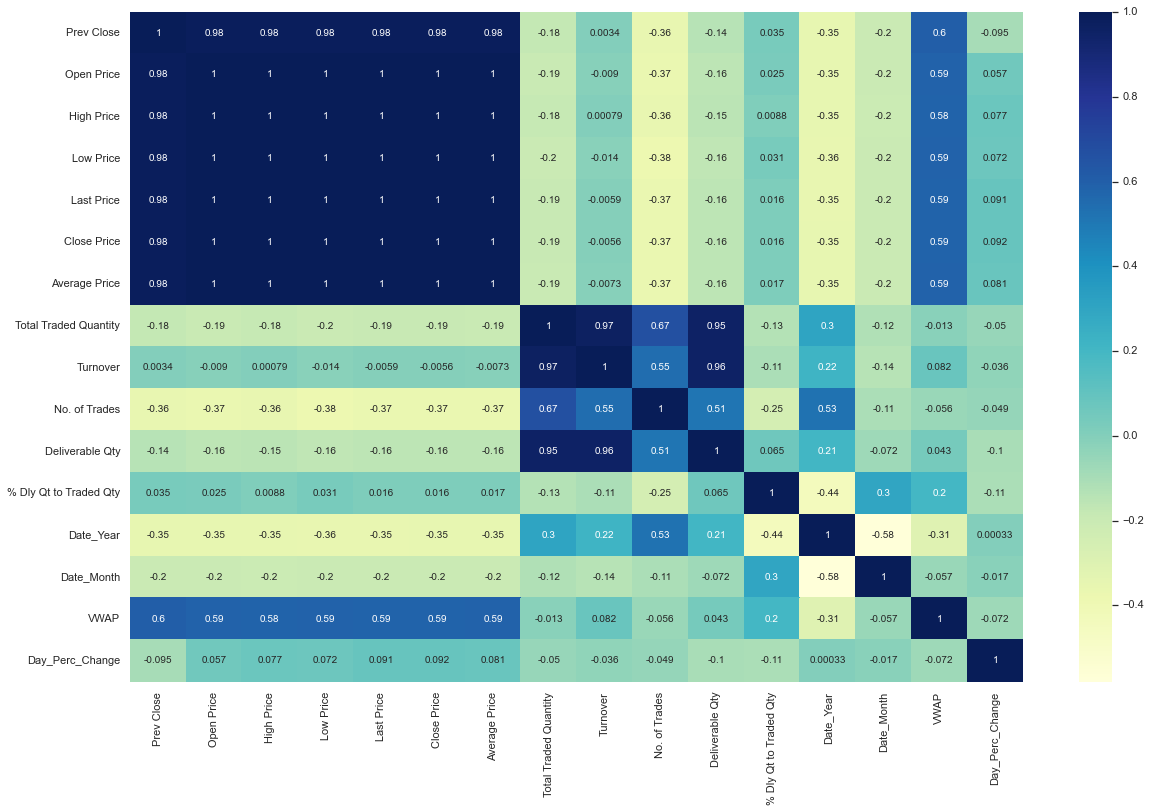

In [23]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True)
plt.show()

In [24]:
! dir/s

 Volume in drive D is Programming
 Volume Serial Number is A065-1032

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 2

30-06-2020  04:05 PM    <DIR>          .
27-06-2020  03:47 PM    <DIR>          ..
19-06-2020  11:31 PM    <DIR>          .ipynb_checkpoints
20-06-2020  12:23 AM    <DIR>          Datasets
30-06-2020  04:05 PM         1,225,582 Module 2 Week 3.ipynb
20-06-2020  12:29 AM            31,537 Nifty50.csv
30-06-2020  04:05 PM           145,749 week3.csv
               3 File(s)      1,402,868 bytes

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 2\.ipynb_checkpoints

19-06-2020  11:31 PM    <DIR>          .
30-06-2020  04:05 PM    <DIR>          ..
30-06-2020  04:05 PM         1,225,582 Module 2 Week 3-checkpoint.ipynb
               1 File(s)      1,225,582 bytes

 Directory of D:\My Projects\Machine Learning Projects\ML\ML\Projects\Internship\Module 2\Datasets

20-06-2020  12:23 AM    <DIR> 

In [25]:
df1 = pd.read_csv('Datasets/ASIANPAINT.csv')
df2 = pd.read_csv('Datasets/AXISBANK.csv')
df3 = pd.read_csv('Datasets/DRREDDY.csv')
df4 = pd.read_csv('Datasets/LT.csv')
df5 = pd.read_csv('Datasets/RELIANCE.csv')
print("Loaded all 5 dataset files successfully!")

Loaded all 5 dataset files successfully!


In [26]:
df1.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.9,1149.9,1135.0,1149.9,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.9,1149.7,1129.6,1143.5,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26


In [27]:
df2.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.0,505.0,508.5,498.4,500.25,500.1,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.1,502.1,504.5,493.5,502.05,501.5,499.85,8610492,4.303938e+09,101028,4027982,46.78


In [28]:
df3.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,DRREDDY,EQ,15-May-2017,2580.8,2600.0,2699.0,2592.0,2667.5,2675.8,2655.42,946756,2.514038e+09,60746,392469,41.45
1,DRREDDY,EQ,16-May-2017,2675.8,2690.8,2734.0,2690.8,2717.5,2724.1,2721.18,440462,1.198577e+09,27798,144587,32.83


In [29]:
df4.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.6,1748.6,1751.55,1736.50,1742.0,1742.4,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.4,1747.0,1748.25,1727.55,1740.6,1740.7,1736.62,1102926,1.915365e+09,48756,674148,61.12


In [30]:
df5.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.4,1333.5,1343.6,1344.1,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.9,1341.0,1356.2,1356.3,1360.59,2892947,3.936121e+09,79767,1238129,42.80


In [31]:
dfs = pd.concat([df1, df2, df3, df4, df5], axis=0)
dfs.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.9,1149.9,1135.00,1149.90,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.9,1149.7,1129.60,1143.50,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26
2,ASIANPAINT,EQ,17-May-2017,1142.85,1143.0,1159.0,1136.55,1156.75,1154.95,1149.76,579709,6.665239e+08,24824,282528,48.74


In [32]:
dfs.Series.value_counts(normalize=True)

EQ    0.99798
BL    0.00202
Name: Series, dtype: float64

In [33]:
### Retaining only those rows for which ‘Series’ column has value ‘EQ’
dfs = dfs[dfs['Series'] == 'EQ'] ## All Rows from each dataset where the Series.value is "EQ"
dfs.dropna(inplace = True)

In [34]:
dfs.Series.value_counts(normalize=True)

EQ    1.0
Name: Series, dtype: float64

In [35]:
dfs.Symbol.value_counts(normalize=True)

DRREDDY       0.2
ASIANPAINT    0.2
AXISBANK      0.2
RELIANCE      0.2
LT            0.2
Name: Symbol, dtype: float64

#### Creating a `DataFrame` that is having Closing prices of each Stock

In [36]:
stocks_li = ['ASIANPAINT', 'AXISBANK', 'DRREDDY', 'LT', 'RELIANCE']

close_prices_df = pd.DataFrame(columns = stocks_li)

close_prices_df['Date'] = df1['Date']

for dfs in zip([df1, df2, df3, df4, df5], stocks_li):
    close_prices_df[dfs[1]] = dfs[0]['Close Price']

close_prices_df.set_index('Date', inplace = True)
close_prices_df.head()

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
15-May-2017,1148.05,500.1,2675.80,1742.40,1344.10
16-May-2017,1142.85,501.5,2724.10,1740.70,1356.30
17-May-2017,1154.95,502.8,2736.90,1755.45,1353.10
18-May-2017,1151.35,492.0,2678.95,1722.60,1327.35
19-May-2017,1123.15,501.7,2656.45,1724.55,1318.85


- This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. 

- Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop `Nan` values from this dataframe.

In [37]:
correlation = close_prices_df.pct_change().dropna()
correlation.head()

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
16-May-2017,-0.004529,0.002799,0.018051,-0.000976,0.009077
17-May-2017,0.010588,0.002592,0.004699,0.008474,-0.002359
18-May-2017,-0.003117,-0.021480,-0.021174,-0.018713,-0.019030
19-May-2017,-0.024493,0.019715,-0.008399,0.001132,-0.006404
22-May-2017,-0.009438,0.001196,-0.017975,0.015888,0.004019


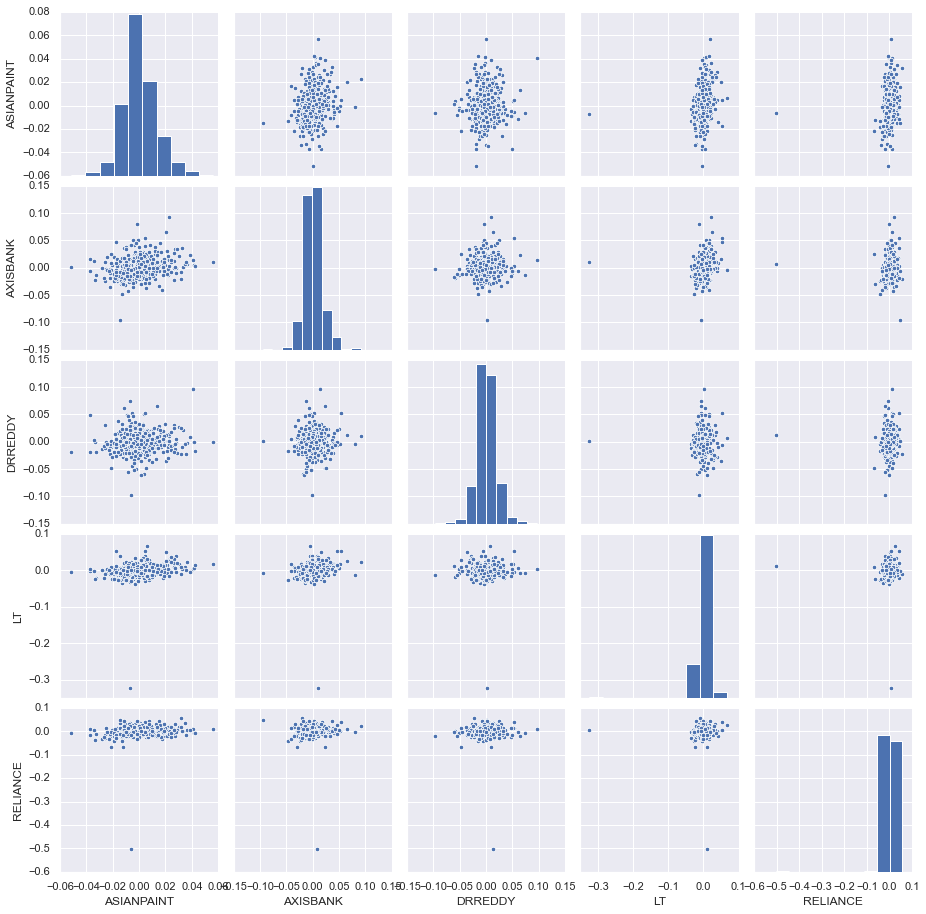

In [38]:
sns.pairplot(correlation)

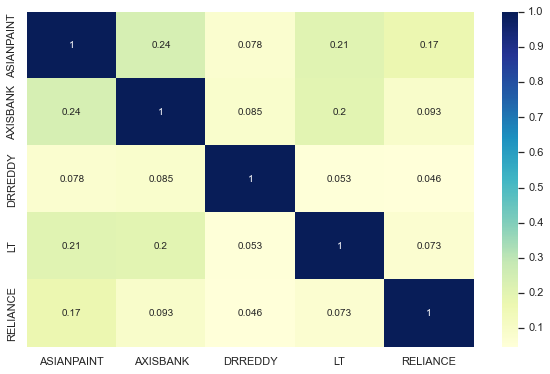

In [39]:
plt.figure(figsize=(10, 6))
corr = correlation.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

## 2.7 Volatility is the change in variance in the returns of a stock over a specific period of time.
__Do give the following documentation on <a href="https://www.investopedia.com/terms/v/volatility.asp">volatility</a> a read.__

You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

Note: pandas provides a `rolling()` function for dataframes and a `std()` function also which you can use.

#### To calculate variance, follow the five steps below.

1. Find the mean of the data set. This means adding each value, and then dividing it by the number of values. If we add, 1, plus 2, plus 3, all the way to up to 10, we get 55. This is divided by 10, because we have 10 numbers in our data set. This provides a mean, or average price, of 5.50.

2. Calculate the difference between each data value and the mean. This is often called deviation. For example, we take 10 - 5.50 = 4.50, then 9 - 5.50 = 3.50. This continues all the way down to the our first data value of 1. Negative numbers are allowed. Since we need each value, these calculation are frequently done in a spreadsheet.

3. Square the deviations. This will eliminate negative values.

4. Add the squared deviations together. In our example, this equals 82.5.

5. Divide the sum of the squared deviations (82.5) by the number of data values.

In [40]:
df['Volatility'] = df['Close Price'].pct_change().rolling(7).std() * np.sqrt(7)
df.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Date_Year,Date_Month,VWAP,Day_Perc_Change,Trend,Volatility
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.0,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39,2017,5,2365.10,0.00000,Slight or No change,NaN
2017-05-16,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.1,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84,2017,5,2407.67,0.02708,Slight or No change,NaN
2017-05-17,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.0,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74,2017,5,2424.20,0.01079,Slight or No change,NaN


In [41]:
correlation_volatility = correlation.rolling(7).std() * np.sqrt(7)
correlation_volatility.sample(10)

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
30-Oct-2017,0.050058,0.060269,0.030621,0.052470,0.043564
27-Feb-2019,0.013636,0.015943,0.034716,0.024747,0.025942
22-Feb-2018,0.024820,0.039495,0.037171,0.031176,0.030673
25-Mar-2019,0.011939,0.028118,0.022922,0.035753,0.044334
22-Jun-2017,0.015558,0.029780,0.033499,0.032609,0.028806
18-Jul-2018,0.021903,0.053309,0.100854,0.026765,0.053434
29-Jan-2019,0.034090,0.026119,0.030287,0.023952,0.056294
09-Oct-2017,0.033015,0.019671,0.045376,0.016086,0.042974
26-Dec-2018,0.057372,0.048549,0.022102,0.035472,0.036131


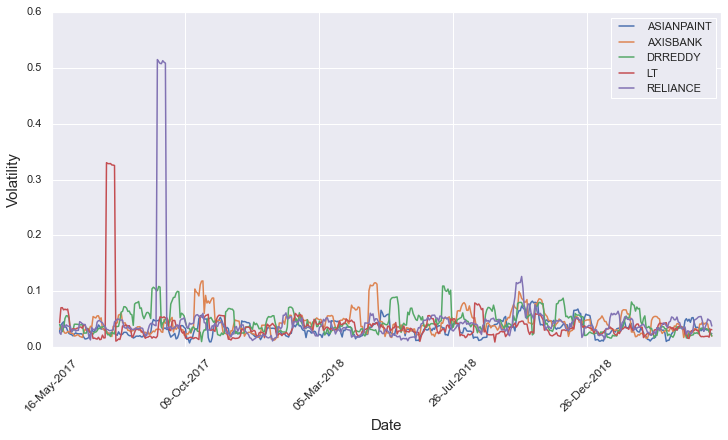

In [42]:
correlation_volatility.plot(figsize=(12, 6))
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Volatility", fontsize=15)
plt.legend()
plt.show()

## 2.8 Calculate the volatility for the `Nifty50` Index and Compare the two

This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [43]:
nifty = pd.read_csv('Nifty50.csv') ### Loading Nifty50.csv file from base Directory
nifty.head(3)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23


In [44]:
nifty.set_index('Date', inplace=True, drop=False)
nifty.shape

(494, 7)

In [45]:
nifty['Volatility'] = nifty.Close.pct_change().rolling(7).std() * np.sqrt(7)
nifty.tail(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volatility
Date,,,,,,,,
26-Apr-2019,26-Apr-2019,11683.75,11762.90,11661.75,11754.65,333483764,18098.83,0.025797
30-Apr-2019,30-Apr-2019,11748.75,11756.25,11655.90,11748.15,532630874,23324.98,0.024287
02-May-2019,02-May-2019,11725.55,11789.30,11699.55,11724.75,380278045,17790.06,0.024195
03-May-2019,03-May-2019,11722.60,11770.90,11699.35,11712.25,305519934,15156.32,0.018924
06-May-2019,06-May-2019,11605.80,11632.55,11571.35,11598.25,299046480,14703.42,0.021966
07-May-2019,07-May-2019,11651.50,11657.05,11484.45,11497.90,337495624,16632.84,0.017630
08-May-2019,08-May-2019,11478.70,11479.10,11346.95,11359.45,372826025,17440.01,0.019601
09-May-2019,09-May-2019,11322.40,11357.60,11255.05,11301.80,373028059,17602.86,0.012183
10-May-2019,10-May-2019,11314.15,11345.80,11251.05,11278.90,387323416,18085.19,0.011545


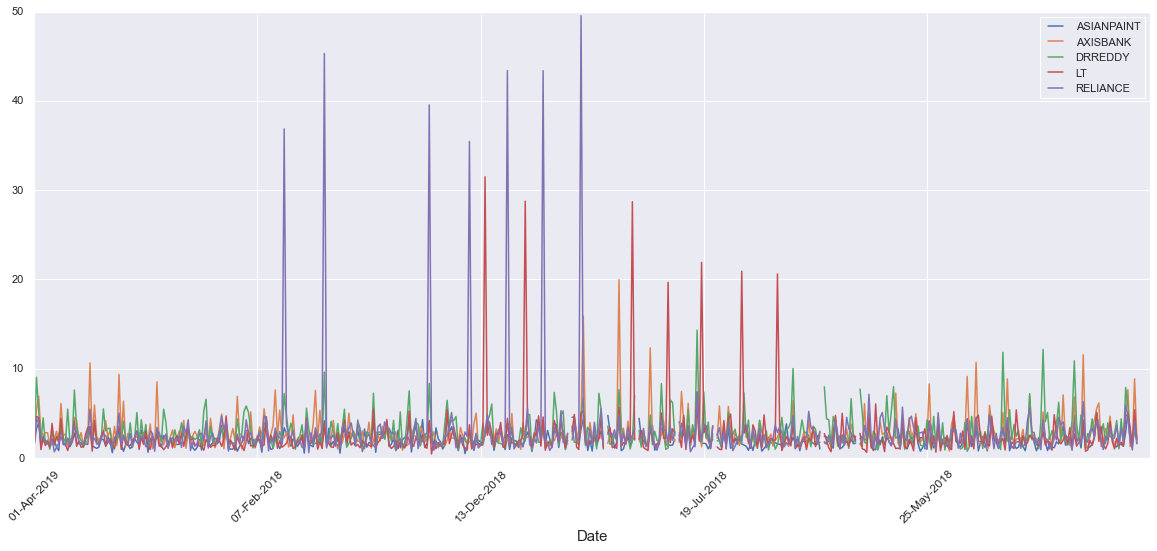

In [46]:
corr_beta = pd.DataFrame()

for name in correlation_volatility.columns:
    corr_beta[name] = correlation_volatility[name] / nifty['Volatility']
    
corr_beta.plot(figsize=(20, 8))
plt.xticks(rotation=45, fontsize=12)
plt.xlabel("Date", fontsize=15)
plt.show()

## 2.9 Trade Calls - Using Simple Moving Averages. Study about moving averages here.

- Plot the 21 day and 34 day Moving average with the average price and decide a Call !

- Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.

- One of the most widely used technical indicators.

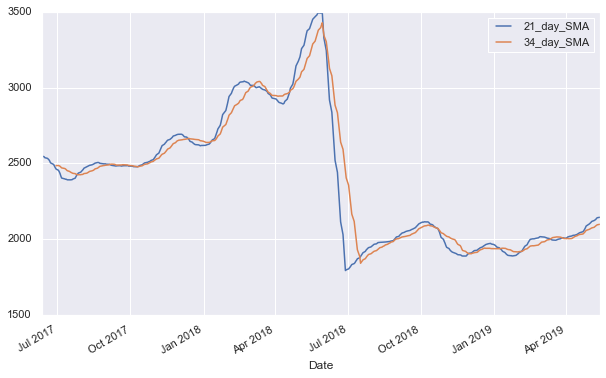

In [47]:
df["21_day_SMA"] = df['Close Price'].rolling(21).mean()
df["34_day_SMA"] = df['Close Price'].rolling(34).mean()
df[["21_day_SMA", "34_day_SMA"]].plot(figsize=(10, 6))
plt.show()

In [48]:
df.set_index('Date', inplace= True)
prev_index = df.index[0]
prev_row = df[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
df['Trade_Call'] = 'HODL'

In [49]:
for index, row in df.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        df.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
req = df[["Close Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][df['Trade_Call'] != "HODL" ]
req

,Close Price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-07-27,2481.70,2428.323810,2425.120588,BUY
2017-09-06,2453.20,2489.945238,2493.472059,SELL
2017-10-11,2500.35,2479.214286,2477.175000,BUY
2017-12-13,2628.40,2662.069048,2664.892647,SELL
2018-01-11,2790.50,2647.559524,2646.360294,BUY
2018-03-06,3042.80,3010.721429,3020.742647,SELL
2018-04-20,3402.45,2996.919048,2982.477941,BUY
2018-06-01,1732.45,3328.928571,3346.585294,SELL
2018-07-17,2002.15,1883.923810,1838.869118,BUY


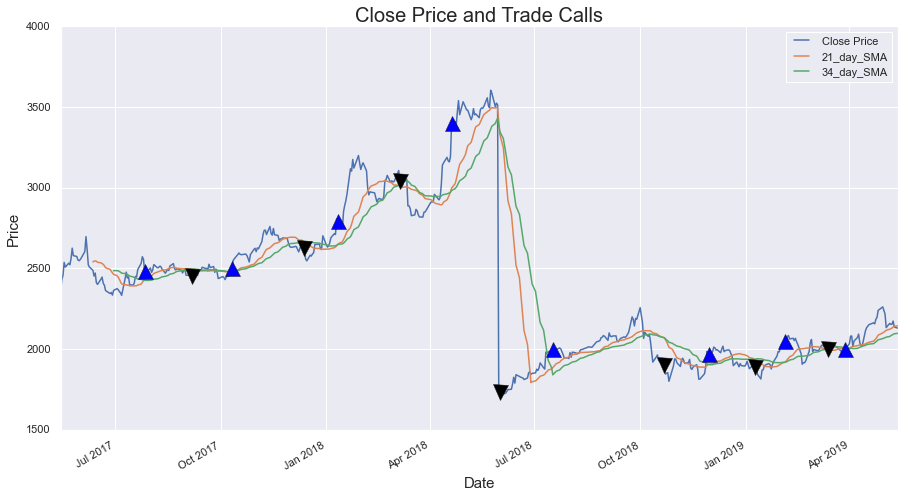

In [50]:
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111, ylabel="Price")

df[["Close Price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot(df["Close Price"][df['Trade_Call'] == 'BUY' ].index, 
         df["Close Price"][df['Trade_Call'] == 'BUY' ], '^', markersize=15, color='blue' )

ax1.plot(df["Close Price"][df['Trade_Call'] == 'SELL' ].index, 
         df["Close Price"][df['Trade_Call'] == 'SELL' ], 'v', markersize=15, color='black' )

plt.xlabel("Date", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Close Price and Trade Calls", fontsize=20)
plt.show()

## 2.10 Trade Calls - Using Bollinger Bands
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average The bollinger bands comprise the following data points-

- The 14 day rolling mean of the closing price (we call it the average)
- Upper band which is the rolling mean + 2 standard deviations away from the average.
- Lower band which is the rolling mean - 2 standard deviations away from the average.
- Average Daily stock price.<br>

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands. Save to a new csv file.

In [ ]:
fig = plt.figure(figsize=(15, 8))
df["14_day_SMA"] = df['Close Price'].rolling(14).mean()
df["14_day_STD"] = df['Close Price'].rolling(14).std()
df["14_day_bollinger_upper"] = df["14_day_SMA"] + df["14_day_STD"] * 2
df["14_day_bollinger_lower"] = df["14_day_SMA"] - df["14_day_STD"] * 2
df.reset_index(inplace=True)

ax = plt.gca()

df.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
df.plot(kind='line',x='Date', y='14_day_SMA', ax=ax, color='blue', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_upper', ax=ax, color='red', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_lower', ax=ax, color='red', linestyle='--')

plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [ ]:
file_name = 'week3.csv'
df.to_csv(file_name)
print("Saved Successfully as '{}'".format(file_name))